In [111]:
import os
import requests
import yfinance as yf # Used to grab the stock prices, with yahoo
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from utils.MCForecastTools import MCSimulation


In [112]:
amazon = yf.Ticker("AMZN")
walmart = yf.Ticker("WMT")
ebay = yf.Ticker("EBAY")
target = yf.Ticker("TGT")
overstock = yf.Ticker("OSTK")
print(walmart)

yfinance.Ticker object <WMT>


In [113]:
total_investment = 500000

#Amazon Data
initial_amazon_price = 1627.800049
initial_amazon_investment = 100000
amount_of_amazon_stock = initial_amazon_investment/initial_amazon_price
current_amazon_price = amazon.info['open']
current_amazon_investment_value = current_amazon_price * amount_of_amazon_stock

#Walmart Data
initial_walmart_price = 97.519066
initial_walmart_investment = 100000
amount_of_walmart_stock = initial_walmart_investment/initial_walmart_price
current_walmart_price = walmart.info['open']
current_walmart_investment_value = current_walmart_price * amount_of_walmart_stock

#Ebay Data
initial_ebay_price = 28.541014
initial_ebay_investment = 100000
amount_of_ebay_stock = initial_ebay_investment/initial_ebay_price
current_ebay_price = ebay.info['open']
current_ebay_investment_value = current_ebay_price * amount_of_ebay_stock

#Target Data
initial_target_price = 79.590614
initial_target_investment = 100000
amount_of_target_stock = initial_target_investment/initial_target_price
current_target_price = target.info['open']
current_target_investment_value = current_target_price * amount_of_target_stock

#Overstock Data
initial_overstock_price = 19.799999
initial_overstock_investment = 100000
amount_of_overstock_stock = initial_overstock_investment/initial_overstock_price
current_overstock_price = overstock.info['open']
current_overstock_investment_value = current_overstock_price * amount_of_overstock_stock


print("Current Amazon Price:",current_amazon_price)
print("Current Amazon Investment Value:",current_amazon_investment_value)
print("Current Walmart Price:",current_walmart_price)
print("Current Walmart Investment Value:",current_walmart_investment_value)
print("Current Ebay Price:",current_ebay_price)
print("Current Ebay Investment Value:",current_ebay_investment_value)
print("Current Target Price:",current_target_price)
print("Current Target Investment Value:",current_target_investment_value)
print("Current Overstock Price:",current_overstock_price)
print("Current Overstock Investment Value:",current_overstock_investment_value)

Current Amazon Price: 3515.25
Current Amazon Investment Value: 215950.97027792264
Current Walmart Price: 149.52
Current Walmart Investment Value: 153323.86386883567
Current Ebay Price: 74.1
Current Ebay Investment Value: 259626.3748723153
Current Target Price: 252.78
Current Target Investment Value: 317600.26376979577
Current Overstock Price: 105.67
Current Overstock Investment Value: 533686.8956407523


# Amazon Expected Rate of Return Calculations

In [114]:
amazon_historical_year1_begin = amazon.history(start="2018-11-05", end="2018-11-06")
amazon_historical_year1_end = amazon.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_amazon = amazon_historical_year1_begin['Close']['2018-11-05']
current_value_year1_amazon= amazon_historical_year1_end['Close']['2019-11-05']

In [115]:
year1_ror_amazon = ((current_value_year1_amazon - initial_value_year1_amazon)/initial_value_year1_amazon)*100

year1_ror_amazon

10.683739211985838

In [116]:
amazon_historical_year2_begin = amazon.history(start="2019-11-05", end="2019-11-06")
amazon_historical_year2_end = amazon.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_amazon = amazon_historical_year2_begin['Close']['2019-11-05']
current_value_year2_amazon= amazon_historical_year2_end['Close']['2020-11-05']

In [117]:
year2_ror_amazon = ((current_value_year2_amazon - initial_value_year2_amazon)/initial_value_year2_amazon)*100

year2_ror_amazon

84.38039817859662

In [118]:
amazon_historical_year3_begin = amazon.history(start="2020-11-05", end="2020-11-06")
amazon_historical_year3_end = amazon.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_amazon = amazon_historical_year3_begin['Close']['2020-11-05']
current_value_year3_amazon= amazon_historical_year3_end['Close']['2021-11-03']

In [119]:
year3_ror_amazon = ((current_value_year3_amazon - initial_value_year3_amazon)/initial_value_year3_amazon)*100

year3_ror_amazon

1.8663455749548463

In [120]:
expected_ror_amazon = (year1_ror_amazon + year2_ror_amazon + year3_ror_amazon)/3

expected_ror_amazon

32.310160988512436

# Walmart Expected Rate of Return Calculations

In [121]:
walmart_historical_year1_begin = walmart.history(start="2018-11-05", end="2018-11-06")
walmart_historical_year1_end = walmart.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_wmt = walmart_historical_year1_begin['Close']['2018-11-05']
current_value_year1_wmt= walmart_historical_year1_end['Close']['2019-11-05']

In [122]:
year1_ror_wmt = ((current_value_year1_wmt - initial_value_year1_wmt)/initial_value_year1_wmt)*100

year1_ror_wmt

17.952111939766628

In [123]:
walmart_historical_year2_begin = walmart.history(start="2019-11-05", end="2019-11-06")
walmart_historical_year2_end = walmart.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_wmt = walmart_historical_year2_begin['Close']['2019-11-05']
current_value_year2_wmt= walmart_historical_year2_end['Close']['2020-11-05']

In [124]:
year2_ror_wmt = ((current_value_year2_wmt - initial_value_year2_wmt)/initial_value_year2_wmt)*100

year2_ror_wmt

22.821495133636702

In [125]:
walmart_historical_year3_begin = walmart.history(start="2020-11-05", end="2020-11-06")
walmart_historical_year3_end = walmart.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_wmt = walmart_historical_year3_begin['Close']['2020-11-05']
current_value_year3_wmt= walmart_historical_year3_end['Close']['2021-11-03']

In [126]:
year3_ror_wmt = ((current_value_year3_wmt - initial_value_year3_wmt)/initial_value_year3_wmt)*100

year3_ror_wmt

6.302263743819454

In [127]:
expected_ror_wmt = (year1_ror_wmt + year2_ror_wmt + year3_ror_wmt)/3

expected_ror_wmt

15.69195693907426

# Ebay Expected Rate of Return Calculations

In [128]:
ebay_historical_year1_begin = ebay.history(start="2018-11-05", end="2018-11-06")
ebay_historical_year1_end = ebay.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_ebay = ebay_historical_year1_begin['Close']['2018-11-05']
current_value_year1_ebay= ebay_historical_year1_end['Close']['2019-11-05']

In [129]:
year1_ror_ebay = ((current_value_year1_ebay - initial_value_year1_ebay)/initial_value_year1_ebay)*100

year1_ror_ebay

21.036555843207054

In [130]:
ebay_historical_year2_begin = ebay.history(start="2019-11-05", end="2019-11-06")
ebay_historical_year2_end = ebay.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_ebay = ebay_historical_year2_begin['Close']['2019-11-05']
current_value_year2_ebay= ebay_historical_year2_end['Close']['2020-11-05']

In [131]:
year2_ror_ebay = ((current_value_year2_ebay - initial_value_year2_ebay)/initial_value_year2_ebay)*100

year2_ror_ebay

41.37558553763453

In [132]:
ebay_historical_year3_begin = ebay.history(start="2020-11-05", end="2020-11-06")
ebay_historical_year3_end = ebay.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_ebay = ebay_historical_year3_begin['Close']['2020-11-05']
current_value_year3_ebay= ebay_historical_year3_end['Close']['2021-11-03']

In [133]:
year3_ror_ebay = ((current_value_year3_ebay - initial_value_year3_ebay)/initial_value_year3_ebay)*100

year3_ror_ebay

54.4894647691238

In [134]:
expected_ror_ebay = (year1_ror_ebay + year2_ror_ebay + year3_ror_ebay)/3

expected_ror_ebay

38.96720204998846

# Target Expected Rate of Return Calculations

In [135]:
target_historical_year1_begin = target.history(start="2018-11-05", end="2018-11-06")
target_historical_year1_end = target.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_target = target_historical_year1_begin['Close']['2018-11-05']
current_value_year1_target= target_historical_year1_end['Close']['2019-11-05']

In [136]:
year1_ror_target = ((current_value_year1_target - initial_value_year1_target)/initial_value_year1_target)*100

year1_ror_target

33.37207592487113

In [137]:
target_historical_year2_begin = target.history(start="2019-11-05", end="2019-11-06")
target_historical_year2_end = target.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_target = target_historical_year2_begin['Close']['2019-11-05']
current_value_year2_target= target_historical_year2_end['Close']['2020-11-05']

In [138]:
year2_ror_target = ((current_value_year2_target - initial_value_year2_target)/initial_value_year2_target)*100

year2_ror_target

47.3076244157478

In [139]:
target_historical_year3_begin = target.history(start="2020-11-05", end="2020-11-06")
target_historical_year3_end = target.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_target = target_historical_year3_begin['Close']['2020-11-05']
current_value_year3_target= target_historical_year3_end['Close']['2021-11-03']

In [140]:
year3_ror_target = ((current_value_year3_target - initial_value_year3_target)/initial_value_year3_target)*100

year3_ror_target

66.5350453183703

In [141]:
expected_ror_target = (year1_ror_target + year2_ror_target + year3_ror_target)/3

expected_ror_target

49.07158188632974

# Overstock Expected Rate of Return Calculations

In [142]:
overstock_historical_year1_begin = overstock.history(start="2018-11-05", end="2018-11-06")
overstock_historical_year1_end = overstock.history(start="2019-11-05", end="2019-11-06")
initial_value_year1_overstock = overstock_historical_year1_begin['Close']['2018-11-05']
current_value_year1_overstock= overstock_historical_year1_end['Close']['2019-11-05']

In [143]:
year1_ror_overstock = ((current_value_year1_overstock - initial_value_year1_overstock)/initial_value_year1_overstock)*100

year1_ror_overstock

-49.34343374015091

In [144]:
overstock_historical_year2_begin = overstock.history(start="2019-11-05", end="2019-11-06")
overstock_historical_year2_end = overstock.history(start="2020-11-05", end="2020-11-06")
initial_value_year2_overstock = overstock_historical_year2_begin['Close']['2019-11-05']
current_value_year2_overstock= overstock_historical_year2_end['Close']['2020-11-05']

In [145]:
year2_ror_overstock = ((current_value_year2_overstock - initial_value_year2_overstock)/initial_value_year2_overstock)*100

year2_ror_overstock

583.3499774702757

In [146]:
overstock_historical_year3_begin = overstock.history(start="2020-11-05", end="2020-11-06")
overstock_historical_year3_end = overstock.history(start="2021-11-03", end="2021-11-04")
initial_value_year3_overstock = overstock_historical_year3_begin['Close']['2020-11-05']
current_value_year3_overstock= overstock_historical_year3_end['Close']['2021-11-03']

In [147]:
year3_ror_overstock = ((current_value_year3_overstock - initial_value_year3_overstock)/initial_value_year3_overstock)*100

year3_ror_overstock

52.90341647488361

In [148]:
expected_ror_overstock = (year1_ror_overstock + year2_ror_overstock + year3_ror_overstock)/3

expected_ror_overstock

195.6366534016695

In [149]:
amazon_history = amazon.history(period = "3y")

amazon_history['Close']

Date
2018-11-12    1636.849976
2018-11-13    1631.170044
2018-11-14    1599.010010
2018-11-15    1619.439941
2018-11-16    1593.410034
                 ...     
2021-11-03    3384.000000
2021-11-04    3477.000000
2021-11-05    3518.989990
2021-11-08    3488.979980
2021-11-09    3576.229980
Name: Close, Length: 754, dtype: float64

In [150]:
walmart_history = walmart.history(period = "3y")

walmart_history['Close']

Date
2018-11-12     98.428772
2018-11-13     97.547501
2018-11-14     96.211357
2018-11-15     94.325592
2018-11-16     92.572517
                 ...    
2021-11-03    150.179993
2021-11-04    151.279999
2021-11-05    150.229996
2021-11-08    149.270004
2021-11-09    149.789993
Name: Close, Length: 754, dtype: float64

In [151]:
ebay_history = ebay.history(period = "3y")

ebay_history['Close']

Date
2018-11-12    27.886225
2018-11-13    27.058111
2018-11-14    26.855900
2018-11-15    27.125515
2018-11-16    27.077372
                ...    
2021-11-03    75.449997
2021-11-04    76.279999
2021-11-05    75.570000
2021-11-08    73.760002
2021-11-09    73.959999
Name: Close, Length: 754, dtype: float64

In [152]:
target_history = target.history(period = "3y")

target_history['Close']

Date
2018-11-12     79.702522
2018-11-13     78.630119
2018-11-14     77.520416
2018-11-15     75.310349
2018-11-16     74.303223
                 ...    
2021-11-03    260.410004
2021-11-04    260.440002
2021-11-05    254.270004
2021-11-08    253.330002
2021-11-09    255.160004
Name: Close, Length: 754, dtype: float64

In [153]:
overstock_history = overstock.history(period = "3y")

overstock_history['Close']

Date
2018-11-12     17.760000
2018-11-13     17.790001
2018-11-14     16.950001
2018-11-15     17.530001
2018-11-16     17.190001
                 ...    
2021-11-03    104.800003
2021-11-04    104.889999
2021-11-05    104.459999
2021-11-08    105.360001
2021-11-09    101.980003
Name: Close, Length: 754, dtype: float64

In [154]:
start = datetime(2018, 11, 5)
symbols_list = ['AMZN', 'WMT', 'EBAY', 'TGT', 'OSTK']


In [155]:
overstock_df = pd.DataFrame(data = overstock_history['Close'])
target_df = pd.DataFrame(data = target_history['Close'])
ebay_df = pd.DataFrame(data = ebay_history['Close'])
walmart_df = pd.DataFrame(data = walmart_history['Close'])
amazon_df = pd.DataFrame(data = amazon_history['Close'])


dataframe = pd.concat([overstock_df, target_df, ebay_df, walmart_df, amazon_df], axis = 1)

dataframe.columns = [ "Overstock", "Target", "Ebay", "Walmart", "Amazon"]
display(dataframe)

,Overstock,Target,Ebay,Walmart,Amazon
Date,,,,,
2018-11-12,17.760000,79.702522,27.886225,98.428772,1636.849976
2018-11-13,17.790001,78.630119,27.058111,97.547501,1631.170044
2018-11-14,16.950001,77.520416,26.855900,96.211357,1599.010010
2018-11-15,17.530001,75.310349,27.125515,94.325592,1619.439941
2018-11-16,17.190001,74.303223,27.077372,92.572517,1593.410034
...,...,...,...,...,...
2021-11-03,104.800003,260.410004,75.449997,150.179993,3384.000000
2021-11-04,104.889999,260.440002,76.279999,151.279999,3477.000000
2021-11-05,104.459999,254.270004,75.570000,150.229996,3518.989990


In [156]:
corr_df = dataframe.corr(method='pearson')
 #reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.head(10)

,Overstock,Target,Ebay,Walmart,Amazon
Overstock,1.000000,0.827188,0.882598,0.805327,0.921020
Target,0.827188,1.000000,0.935963,0.896235,0.887373
Ebay,0.882598,0.935963,1.000000,0.851498,0.922229
Walmart,0.805327,0.896235,0.851498,1.000000,0.921137
Amazon,0.921020,0.887373,0.922229,0.921137,1.000000


<AxesSubplot:>

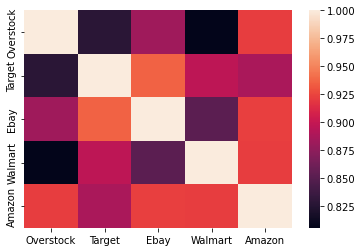

In [157]:
# Create a heatmap from the correlation values
sns.heatmap(corr_df)

# Overstock Portfolio Variances

In [158]:
overstock_std = float(overstock_df['Close'].std())/100
target_std = float(target_df['Close'].std())/100
ebay_std = float(ebay_df['Close'].std())/100
walmart_std = float(walmart_df['Close'].std())/100
amazon_std = float(amazon_df['Close'].std())/100

In [159]:
display(overstock_std)
display(target_std)
display(ebay_std)
display(walmart_std)
display(amazon_std)

0.3248195960683731

0.605191241562383

0.14043802138248537

0.18674198157580546

7.226393299242334

In [160]:
def variance(weight1, std_1, weight2, std_2, corr_ratio):
    variance = (((weight1 ** 2) * (std_1 ** 2)) + ((weight2 ** 2) * (std_2 ** 2)) + ((weight1 ** 2) * (std_1 ** 2) * (weight2 ** 2) * (std_2 ** 2) * (corr_ratio)))
    return variance
                                                                                 

In [161]:
ostk_to_target_variance = variance(.50,overstock_std,.50,target_std,0.825182)
ostk_to_ebay_variance = variance(.50,overstock_std,.50,ebay_std,0.880374)
ostk_to_walmart_variance = variance(.50,overstock_std,.50,walmart_std,0.803650)
ostk_to_amazon_variance = variance(.50,overstock_std,.50,amazon_std,0.825182)

ostk_to_target_percentage = "{:.2%}".format(ostk_to_target_variance)
ostk_to_ebay_percentage = "{:.2%}".format(ostk_to_ebay_variance)
ostk_to_walmart_percentage = "{:.2%}".format(ostk_to_walmart_variance)
ostk_to_amazon_percentage = "{:.2%}".format(ostk_to_amazon_variance)

print("Overstock and Target Portfolio Variance",ostk_to_target_percentage)
print("Overstock and Ebay Portfolio Variance",ostk_to_ebay_percentage)
print("Overstock and Walmart Portfolio Variance",ostk_to_walmart_percentage)
print("Overstock and Amazon Portfolio Variance",ostk_to_amazon_percentage)

Overstock and Target Portfolio Variance 11.99%
Overstock and Ebay Portfolio Variance 3.14%
Overstock and Walmart Portfolio Variance 3.53%
Overstock and Amazon Portfolio Variance 1336.57%


In [162]:
tgt_to_ebay_variance = variance(.50,target_std,.50,ebay_std,0.935200)
tgt_to_walmart_variance = variance(.50,target_std,.50,walmart_std,0.895973)
tgt_to_amazon_variance = variance(.50,target_std,.50,amazon_std,0.887384)

tgt_to_ebay_percentage = "{:.2%}".format(tgt_to_ebay_variance)
tgt_to_walmart_percentage = "{:.2%}".format(tgt_to_walmart_variance)
tgt_to_amazon_percentage = "{:.2%}".format(tgt_to_amazon_variance)


print("Target and Ebay Portfolio Variance",tgt_to_ebay_percentage)
print("Target and Walmart Portfolio Variance",tgt_to_walmart_percentage)
print("Target and Amazon Portfolio Variance",tgt_to_amazon_percentage)

Target and Ebay Portfolio Variance 9.69%
Target and Walmart Portfolio Variance 10.10%
Target and Amazon Portfolio Variance 1420.75%


In [163]:
ebay_to_walmart_variance = variance(.50,ebay_std,.50,walmart_std,0.851683)
ebay_to_amazon_variance = variance(.50,ebay_std,.50,amazon_std,0.922619)

ebay_to_walmart_percentage = "{:.2%}".format(ebay_to_walmart_variance)
ebay_to_amazon_percentage = "{:.2%}".format(ebay_to_amazon_variance)


print("Ebay and Walmart Portfolio Variance",ebay_to_walmart_percentage)
print("Ebay and Amazon Portfolio Variance",ebay_to_amazon_percentage)

Ebay and Walmart Portfolio Variance 1.37%
Ebay and Amazon Portfolio Variance 1311.95%


In [164]:
walmart_to_amazon_variance = variance(.50,walmart_std,.50,amazon_std,0.921194)

walmart_to_amazon_percentage = "{:.2%}".format(walmart_to_amazon_variance)

print("Walmart and Amazon Portfolio Variance",walmart_to_amazon_percentage)

Walmart and Amazon Portfolio Variance 1316.88%


Monte Carlo Simulation

In [165]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("/Users/johannmaiga/Downloads/MyFiles/FinTech Class/.api_keys")

True

In [166]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [167]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
start = pd.Timestamp("2018-11-05", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-11-04", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [168]:
ecom_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame
ecom_stocks.index = ecom_stocks.index.date
ecom_stocks.head()

SPY                                    
              open    high       low   close    volume
2018-11-05  272.44  274.01  271.3500  273.38  55157537
2018-11-06  273.32  275.30  273.2500  275.12  49731823
2018-11-07  277.56  281.10  275.1398  280.91  84960994
2018-11-08  280.14  281.22  279.2200  280.44  49392193
2018-11-09  279.03  279.24  276.1800  277.83  70577729

In [172]:
one_year_simulation = MCSimulation(
    portfolio_data=ecom_stocks,
    num_simulation=500,
    num_trading_days=252,
)

# Review the simulation input data
one_year_simulation.portfolio_data.dropna()

SPY                                                    
              open     high       low    close     volume daily_return
2018-11-06  273.32  275.300  273.2500  275.120   49731823     0.006365
2018-11-07  277.56  281.100  275.1398  280.910   84960994     0.021045
2018-11-08  280.14  281.220  279.2200  280.440   49392193    -0.001673
2018-11-09  279.03  279.240  276.1800  277.830   70577729    -0.009307
2018-11-12  277.15  277.460  271.9900  272.490   78678065    -0.019220
...            ...      ...       ...      ...        ...          ...
2020-10-29  326.91  333.395  325.0900  329.990   74362731     0.010163
2020-10-30  328.28  329.690  322.6000  326.530   93413096    -0.010485
2020-11-02  330.20  332.360  327.2400  330.210   69167640     0.011270
2020-11-03  333.69  338.250  330.2935  335.970   74330624     0.017443
2020-11-04  340.86  347.940  339.5900  343.495  101560371     0.022398

[503 rows x 6 columns]

In [174]:
# Run the Monte Carlo simulation to forecast 1 year cumulative returns
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/johannmaiga/Downloads/MyFiles/FinTech Class/Repos/modern_ecommerce_analysis/utils/MCForecastTools.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978926,1.003254,0.992442,1.019567,1.042454,0.984977,0.988596,1.001214,0.989604,0.998268,...,1.016607,1.010821,0.972935,0.993522,1.018225,0.969324,0.978074,1.014238,0.984451,1.011302
2,0.950299,1.016536,0.952039,1.037039,1.020116,0.984198,0.998745,1.033881,1.025779,0.978798,...,1.018464,1.010751,0.959125,1.006044,0.991146,0.965245,0.977533,1.039272,0.984306,1.010091
3,0.952117,1.015571,0.930366,1.019760,1.035775,0.990032,0.994645,1.044079,1.051820,0.971319,...,1.012041,1.011976,0.960592,1.006832,0.991975,0.970007,0.978338,1.049742,0.987923,1.005202
4,0.975136,1.040986,0.941453,1.011502,1.057167,0.980203,0.985586,1.020697,1.028565,0.968338,...,1.024302,1.001860,0.952493,1.004066,0.999619,0.959817,0.978593,1.036062,1.019369,1.006924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.599678,1.971891,1.335805,0.881386,1.213056,1.397218,1.138970,1.713822,1.349704,0.900388,...,0.921717,1.241285,1.122981,1.023394,1.284003,0.762413,1.342598,1.248184,0.953555,1.227133
249,0.607839,1.956673,1.328816,0.890634,1.210415,1.406805,1.141441,1.681396,1.330888,0.897685,...,0.951844,1.215551,1.101341,0.993590,1.305621,0.767532,1.316030,1.262581,0.959301,1.205401
250,0.600383,1.998016,1.340358,0.859527,1.224927,1.423413,1.154971,1.686310,1.352840,0.902862,...,0.932001,1.219629,1.097919,0.996224,1.308323,0.759438,1.311716,1.260455,0.950523,1.241092
251,0.584984,1.962253,1.342705,0.857316,1.187366,1.411695,1.164390,1.713118,1.387635,0.906908,...,0.959102,1.258988,1.092306,1.007326,1.302179,0.761636,1.293176,1.246520,0.975851,1.263333


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

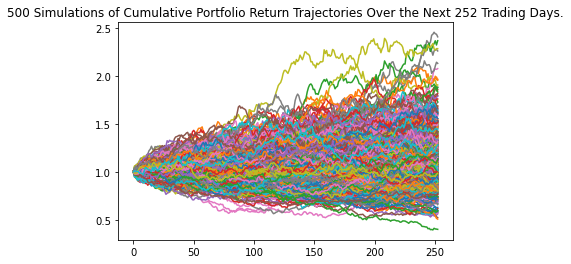

In [177]:
# Plot simulation outcomes
one_year_simulation.plot_simulation()

In [ ]:
# Gathering historical data for our list of 5-10 Eommerce stocks from 2018-2021 and putting in into a dataframe

# selected_stocks = yf.download("AMZN", group_by='tickers', start="2018-11-05", end="2021-11-04")
# selected_stocks.head()

In [ ]:
# ecom_stocks.reset_index()
# selected_stocks.index = selected_stocks.index.date

In [ ]:
# cols = [4, 10, 16, 22, 28]

# cols = [4]
# ecom_stocks = selected_stocks.drop(selected_stocks.columns[cols], axis=1)
# ecom_stocks

In [ ]:
# Formatting the column names into lower case
# ecom_stocks.rename(str.lower, axis='columns')

In [ ]:
# ecom_stocks.reset_index(level=1)


In [ ]:
# one_year_simulation = MCSimulation(
#     portfolio_data=ecom_stocks,
#     weights=[0.25, 0.75],
#     num_simulation=500,
#     num_trading_days=252,
# )

# # Review the simulation input data
# ecom_stocks.portfolio_data.dropna()
# # ecom_stocks.calc_cumulative_return()